# Annually Averaged Scalar Timeseries

This notebook shows how we extract information from ocean_scalar to plot timeseries. The data are resampled onto annual averages.


**Requirements:** The `conda/analysis3-19.04` (or later) module on the VDI (or your own up-to-date cookbook installation).

**Firstly,** load in the required libraries:

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client

It's often a good idea to start a cluster with multiple cores for you to work with. It's not strictly necessary in this case.

In [2]:
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:41537 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


**Next,** we show to plot a single variable from a single experiment. The variable is loaded using ```querying.getvar()```; we then ```resample``` the data onto annual frequency. 

In [5]:
expt =  '025deg_jra55v13_ryf8485_gmredi6'
variable = 'ke_tot'
db = '/g/data3/hh5/tmp/cosima/database/access-om2.db'
darray = cc.querying.getvar(expt, variable, db)
annual_average = darray.resample(time='A').mean(dim='time')

**Then,** the data can be plotted as you see fit:

Text(0.5,1,'025deg_jra55v13_ryf8485_gmredi6')

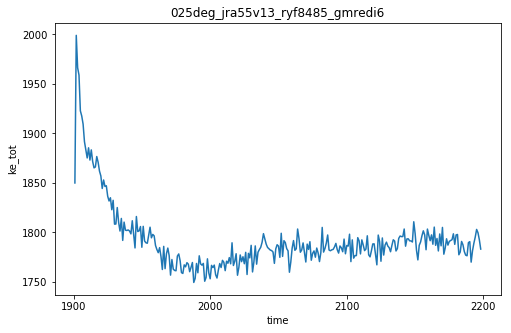

In [4]:
plt.figure(figsize=(8,5))
annual_average.plot()
plt.title(expt)